# Cài đặt mô hình hồi quy Logistic sử dụng thuật toán Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score, confusion_matrix
import seaborn as sns
from google.colab import files

In [ ]:
uploaded=files.upload()
uploaded=files.upload()

Saving Customer_Behaviour_processed.csv to Customer_Behaviour_processed.csv


Saving heart_processed.csv to heart_processed.csv


In [ ]:

# Hàm sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hàm chi phí(Cost Function)
def cost_function(y, p):
    n = len(y)
    epsilon = 1e-15  # Định nghĩa một epsilon rất nhỏ để tránh trường hợp chia cho 0
    sum_error = 0
    for i in range(n):
        sum_error += (y[i] * np.log(p[i] + epsilon) + (1 - y[i]) * np.log(1 - p[i] + epsilon))
    cost = -sum_error / n  # Trung bình cộng các giá trị lỗi
    return cost

# Gradient Descent
def gradient_descent(X, y, learning_rate, n_iterations):
    n_samples, n_features = X.shape
    weights = np.zeros((n_features, 1))
    bias=0.0
    y = y.reshape((-1, 1))
    cost_his=[]
    for _ in range(n_iterations):
        z = np.dot(X, weights)+bias
        p = sigmoid(z)
        w = np.dot(X.T, (p-y)) / n_samples
        b=  np.sum(p-y)/n_samples
        weights= weights-learning_rate * w
        bias= bias-learning_rate * b
        cost=cost_function(y,p)
        cost_his.append(cost)
    return weights,bias,cost_his

# Hàm dự đoán
def predict(X, weights,bias):
    p = sigmoid(np.dot(X, weights)+bias)
    return np.array([1.0 if tmp >= 0.5 else 0.0 for tmp in p])
    # return (p > 0.5).astype(int)


# Ứng dụng trong lĩnh vực Marketing

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


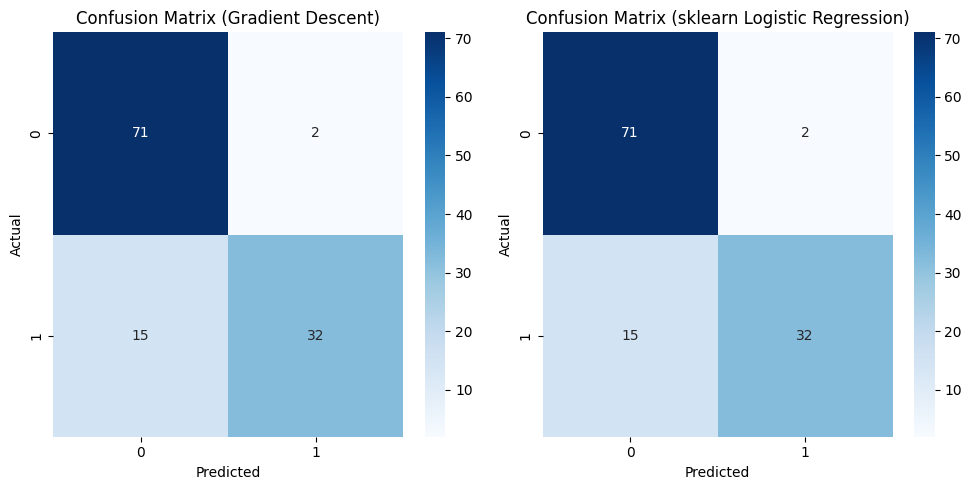

Gradient Descent
accurary score: 0.86
precision score: 0.94
recall score: 0.68
f1 score: 0.79
Sklearn
accurary score: 0.86
precision score: 0.94
recall score: 0.68
f1 score: 0.79


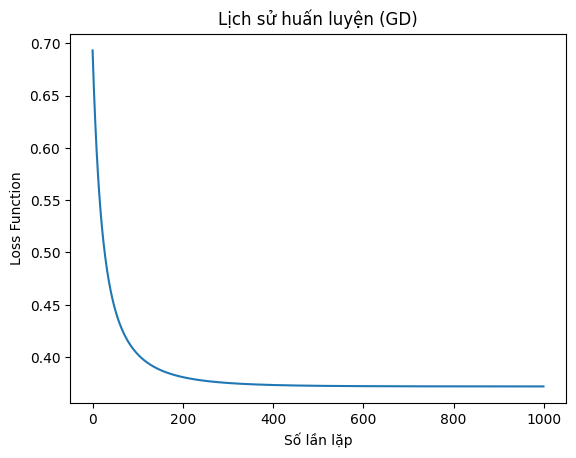

In [ ]:
df=pd.read_csv('Customer_Behaviour_processed.csv')

ft=['Gender','Age','EstimatedSalary']
X = df[ft]  # Chuyển đổi X thành mảng numpy và reshape
y = df['Purchased']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
# 22
MM_scaler = StandardScaler()
X_train_scaled = MM_scaler.fit_transform(X_train)
X_test_scaled = MM_scaler.transform(X_test)
y_train = y_train.values.reshape((-1, 1))
y_test = y_test.values.reshape((-1, 1))

# Huấn luyện mô hình và dự đoán sử dụng Gradient Descent
w,b,cost_his = gradient_descent(X_train_scaled, y_train, learning_rate=0.1, n_iterations=1000)
y_pred = predict(X_test_scaled, w,b)

# Huấn luyện mô hình và dự đoán sử dụng Sklearn
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)
y_pred_test = logistic_model.predict(X_test_scaled)



# Vẽ ma trận nhầm lẫn cho mô hình tự triển khai
conf_matrix_gd = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_gd, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Gradient Descent)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Vẽ ma trận nhầm lẫn cho mô hình sklearn
conf_matrix_sklearn = confusion_matrix(y_test, y_pred_test)
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_sklearn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (sklearn Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Tính toán các độ đo của mô hình
print('Gradient Descent')
print(f"accurary score: {accuracy_score(y_test,y_pred):.2f}")
print(f'precision score: {precision_score(y_test, y_pred):.2f}')
print(f'recall score: {recall_score(y_test, y_pred):.2f}')
print(f'f1 score: {f1_score(y_test, y_pred):.2f}')

print('Sklearn')
print(f"accurary score: {accuracy_score(y_test,y_pred_test):.2f}")
print(f'precision score: {precision_score(y_test, y_pred_test):.2f}')
print(f'recall score: {recall_score(y_test, y_pred_test):.2f}')
print(f'f1 score: {f1_score(y_test, y_pred_test):.2f}')

# Theo dõi quá trình huấn luyện
plt.plot([i for i in range(1000)],cost_his)
plt.xlabel('Số lần lặp')
plt.ylabel('Loss Function')
plt.title('Lịch sử huấn luyện (GD)')
plt.show()


# Ứng dụng lĩnh vực Y tế

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


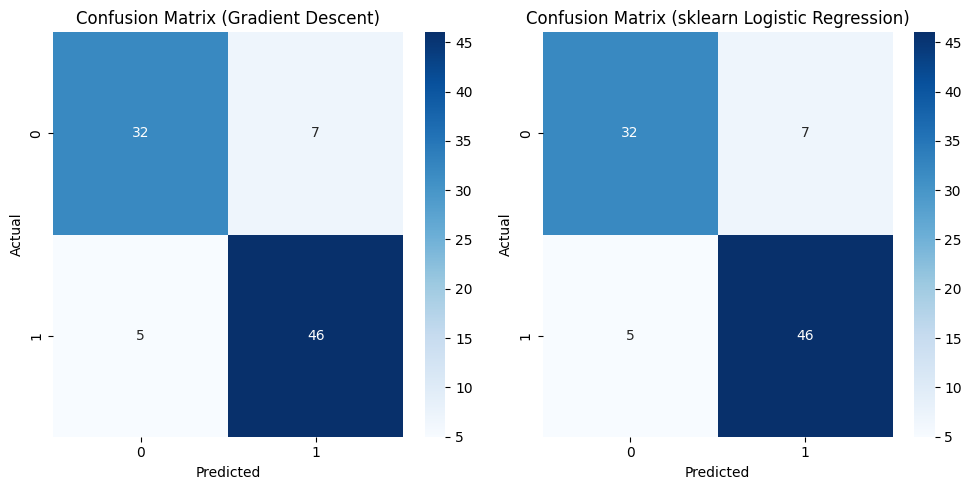

Gradient Descent
accurary score: 0.87
precision score: 0.87
recall score: 0.90
f1 score: 0.88
Sklearn
accurary score: 0.87
precision score: 0.87
recall score: 0.90
f1 score: 0.88


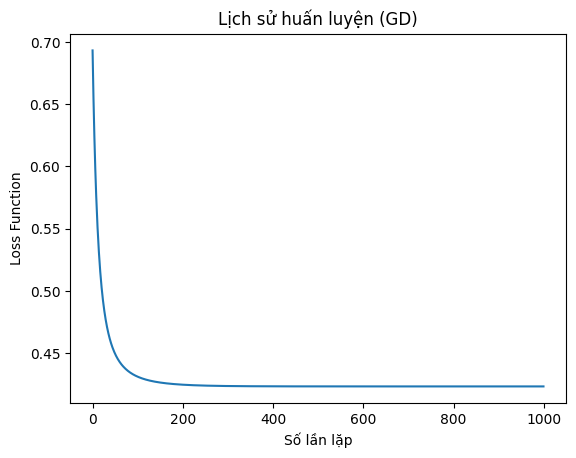

In [ ]:
df=pd.read_csv('heart_processed.csv')

ft=['cp', 'thalachh', 'exng', 'oldpeak', 'caa']
X = df[ft]
y = df['output']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
# 22
MM_scaler = StandardScaler()
X_train_scaled = MM_scaler.fit_transform(X_train)
X_test_scaled = MM_scaler.transform(X_test)
y_train = y_train.values.reshape((-1, 1))
y_test = y_test.values.reshape((-1, 1))

# Huấn luyện mô hình và dự đoán sử dụng Gradient Descent
w,b,cost_his = gradient_descent(X_train_scaled, y_train, learning_rate=0.1, n_iterations=1000)
y_pred = predict(X_test_scaled, w,b)

# Huấn luyện mô hình và dự đoán sử dụng Sklearn
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)
y_pred_test = logistic_model.predict(X_test_scaled)



# Vẽ ma trận nhầm lẫn cho mô hình tự triển khai
conf_matrix_gd = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_gd, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Gradient Descent)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Vẽ ma trận nhầm lẫn cho mô hình sklearn
conf_matrix_sklearn = confusion_matrix(y_test, y_pred_test)
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_sklearn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (sklearn Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Tính toán các độ đo của mô hình
print('Gradient Descent')
print(f"accurary score: {accuracy_score(y_test,y_pred):.2f}")
print(f'precision score: {precision_score(y_test, y_pred):.2f}')
print(f'recall score: {recall_score(y_test, y_pred):.2f}')
print(f'f1 score: {f1_score(y_test, y_pred):.2f}')

print('Sklearn')
print(f"accurary score: {accuracy_score(y_test,y_pred_test):.2f}")
print(f'precision score: {precision_score(y_test, y_pred_test):.2f}')
print(f'recall score: {recall_score(y_test, y_pred_test):.2f}')
print(f'f1 score: {f1_score(y_test, y_pred_test):.2f}')

# Theo dõi quá trình huấn luyện
plt.plot([i for i in range(1000)],cost_his)
plt.xlabel('Số lần lặp')
plt.ylabel('Loss Function')
plt.title('Lịch sử huấn luyện (GD)')
plt.show()